In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
np.random.seed(42)

In [2]:
# сейвим картинки
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "exitimg"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# игнорим минорные ворнинги SciPy
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
def area(box):
    return (box[2] - box[0]) * (box[3] - box[1])


def intersection_over_union(boxes):
    assert(len(boxes) == 8)
    boxA = boxes[:4].values
    boxB = boxes[4:].values
    
    boxAArea = area(boxA)
    boxBArea = area(boxB)
    
    if (boxAArea == 0 or boxBArea == 0):
        return 0
        
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)

    
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

In [4]:
votes = pd.read_csv("final_data/train_data.csv")

In [5]:
answers = pd.read_csv("final_data/train_answers.csv")

In [6]:
quorum = votes.groupby("itemId")[['Xmin','Ymin', 'Xmax', 'Ymax']].mean().reset_index()
# группируем по itemid, возвращаем среднее по всем столбцам со сбросом индекса

In [7]:
data = quorum.merge(answers, on=["itemId"])
# склеиваем с ответами

In [8]:
data["iou"] = data[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)
# прикручиваем intersection_over_union (iou)

In [9]:
data["iou"].mean()
# считаем среднее

0.5058725791429202

In [16]:
votes['Xstart'] = votes[['Xmax','Xmin']].apply(max, axis=1)
votes['Xstop'] = votes[['Xmax','Xmin']].apply(min, axis=1)
votes['width'] = votes['Xstart'] - votes['Xstop']
votes['Ystart'] = votes[['Ymax','Ymin']].apply(max, axis=1)
votes['Ystop'] = votes[['Ymax','Ymin']].apply(min, axis=1)
votes['height'] = votes['Ystart'] - votes['Ystop']

In [17]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5337 entries, 0 to 5336
Data columns (total 12 columns):
userId    5337 non-null int64
itemId    5337 non-null int64
Xmin      5337 non-null int64
Ymin      5337 non-null int64
Xmax      5337 non-null int64
Ymax      5337 non-null int64
Xstart    5337 non-null int64
Xstop     5337 non-null int64
width     5337 non-null int64
Ystart    5337 non-null int64
Ystop     5337 non-null int64
height    5337 non-null int64
dtypes: int64(12)
memory usage: 500.4 KB


In [26]:
droped = votes.drop(columns=['Xmin', 'Ymin', 'Xmax', 'Ymax', 'Xstop', 'Ystop'])

Saving figure person_correlation_droped_plot


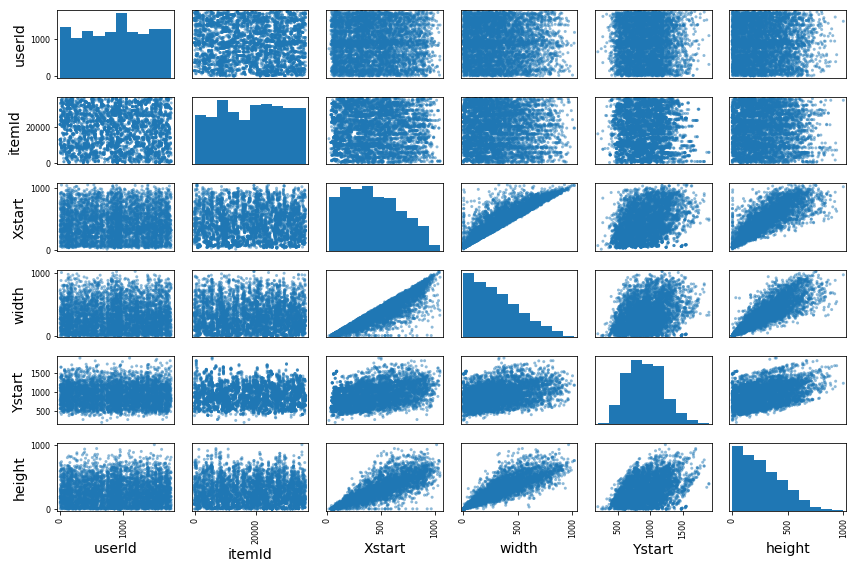

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["userId", "itemId", "Xstart", "width", "Ystart",
              "height"]
scatter_matrix(droped[attributes], figsize=(12, 8))
save_fig("person_correlation_droped_plot")

Saving figure droped_histogram_plots


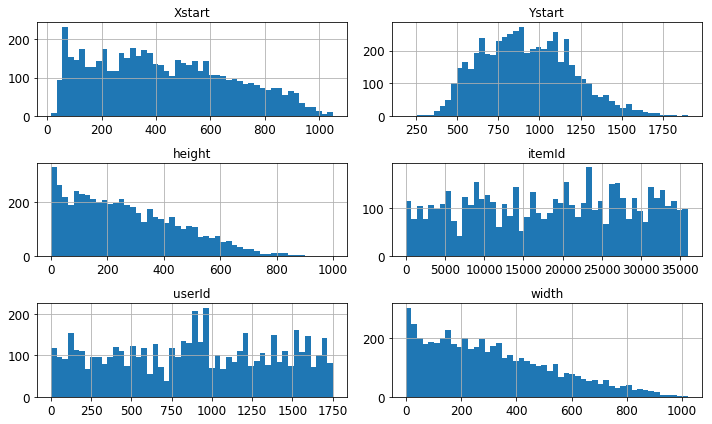

In [28]:
droped.hist(bins=50, figsize=(10,6))
save_fig("droped_histogram_plots")
plt.show()